### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

### Loading dataset

In [2]:
path="C:/Users/argodoy/Documents/Personal_Files/Machine_Learning_October2023/Datathon_2023/Dataset/"
file="bosch_aic_datathon.xlsx"
comp_path=path+file
df=pd.read_excel(comp_path,index_col=0)
df

,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Banda,Baja,ReglaPHT,Alta,Años,Meses,Antigüedad,Clave de sexo,Lugar de nacimiento,Nacionalidad,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
Posición,,,,,,,,,,,,,,,,,,,
POS514,LOG,S6,Exempt,32520,Vol-Otro empleo,E3,2023-01-02,ADMINIST,2018-06-21,5,55.200000,1656,Femenino,JUAREZ,Mexican,31,NaN,solter,0
POS1745,MFS,S5,Direct,32217,Vol-Otro empleo,DNO,2023-01-03,ADMINIST,2017-07-20,6,66.433333,1993,Masculino,DURANGO,Mexican,25,10+ Years,solter,0
POS1230,VS7,S5,Direct,32600,Vol-Otro empleo,DNO,2023-01-03,JT012324,2019-08-29,4,40.766667,1223,Masculino,JUAREZ,Mexican,23,10+ Years,solter,0
POS1661,MFS,S5,Direct,32575,Vol-Estudios,DO,2023-01-03,JT012324,2022-11-03,1,2.033333,61,Femenino,CIUDAD JUAREZ,Mexican,18,10+ Years,solter,0
POS1921,MFS,S5,Direct,32575,Vol-Cambio de domicilio,DO,2023-01-03,JT012324,2017-03-02,6,71.100000,2133,Masculino,JUAREZ,Mexican,26,10+ Years,solter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POS790,QMM,S6,Exempt,32585,Vol-Transferencia entre planta,E4,2022-12-31,ADMINIST,2011-09-12,11,137.600000,4128,Masculino,MEXICO DF,Mexican,44,NaN,casad.,0
POS2802,TEF,S5,Direct,32575,Vol-Cambio de domicilio,DNO,2022-07-26,JT012324,2015-08-05,7,84.900000,2547,Masculino,JUAREZ,Mexican,28,NaN,solter,0
POS538,VS7,S5,Direct,32575,Vol-No regreso / no dio razón,DNO,2022-09-02,JT031800,2022-07-21,0,1.433333,43,Femenino,CHIHUAHUA,Mexican,21,NaN,solter,0


In [3]:
# Hacer la solicitud a la API y obtener la respuesta en formato JSON
response = requests.get("https://sheet.best/api/sheets/1f79da48-9ec8-4116-8347-51c5e69a1763")
data = response.json()
 
# Crear un DataFrame de pandas con los datos
df = pd.DataFrame(data)
 
# Imprimir el DataFrame para visualizar la tabla
df

,ID,Posición,Area,Á.liq.,Grupo de personal,CODIGO POSTAL,Motivo de la RENUNCIA,Tipo de Baja,Banda,Baja,...,Alta,Antigüedad Clas,Antigüedad,Clave de sexo,Lugar de nacimiento,Clasificacion L. N,Edad del empleado,¿Cuanto tiempo tiene viviendo en Cd. Juarez?,Estado Civil,Hijos
0,1,514,7,2,2,32520,280,0,3,1/2/2023,...,6/21/2018,4,1656,0,JUAREZ,1,31,0,3,0
1,2,1745,8,1,1,32217,280,0,1,1/3/2023,...,7/20/2017,5,1993,1,DURANGO,3,25,10,3,0
2,3,1230,15,1,1,32600,280,0,1,1/3/2023,...,8/29/2019,4,1223,1,JUAREZ,1,23,10,3,0
3,4,1661,8,1,1,32575,230,0,2,1/3/2023,...,11/3/2022,1,61,0,JUAREZ,1,18,10,3,0
4,5,1921,8,1,1,32575,220,0,2,1/3/2023,...,3/2/2017,5,2133,1,JUAREZ,1,26,10,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,1399,790,9,2,2,32585,320,0,4,12/31/2022,...,9/12/2011,3,4128,1,MEXICO DF,3,44,0,1,0
1399,1400,2802,10,1,1,32575,220,0,1,7/26/2022,...,8/5/2015,5,2547,1,JUAREZ,1,28,0,3,0
1400,1401,538,15,1,1,32575,270,0,1,9/2/2022,...,7/21/2022,2,43,0,CHIHUAHUA,2,21,0,3,0
1401,1402,538,16,1,1,32600,130,1,1,9/2/2022,...,3/30/2017,4,1982,0,VERACRUZ,3,45,0,4,2


###  Get Dataset Size

In [4]:
df.shape

(1403, 21)

### Identify column names

In [5]:
cols=df.columns
cols

Index(['ID', 'Posición', 'Area', 'Á.liq.', 'Grupo de personal',
       'CODIGO POSTAL', 'Motivo de la RENUNCIA', 'Tipo de Baja', 'Banda',
       'Baja', 'ReglaPHT', 'Alta', 'Antigüedad Clas', 'Antigüedad',
       'Clave de sexo', 'Lugar de nacimiento', 'Clasificacion L. N',
       'Edad del empleado', '¿Cuanto tiempo tiene viviendo en Cd. Juarez?',
       'Estado Civil', 'Hijos'],
      dtype='object')

### Get Dataset Variable Types

In [6]:
df.dtypes

ID                                              object
Posición                                        object
Area                                            object
Á.liq.                                          object
Grupo de personal                               object
CODIGO POSTAL                                   object
Motivo de la RENUNCIA                           object
Tipo de Baja                                    object
Banda                                           object
Baja                                            object
ReglaPHT                                        object
Alta                                            object
Antigüedad Clas                                 object
Antigüedad                                      object
Clave de sexo                                   object
Lugar de nacimiento                             object
Clasificacion L. N                              object
Edad del empleado                               object
¿Cuanto ti

### Replacing column names to make them uniform

In [7]:
df.rename(columns = {
    'Á.liq.':'Aliquido', 'Grupo de personal':'Grupo_de_personal', 'CODIGO POSTAL':'Codigo_postal',
    'Motivo de la RENUNCIA':'Motivo_renuncia','ReglaPHT':'Reglapht', 'Años':'Anios', 'Antigüedad':'Antiguedad',
    'Clave de sexo':'Sexo', 'Lugar de nacimiento':'Lugar_de_nacimiento', 'Edad del empleado':'Edad',
    '¿Cuanto tiempo tiene viviendo en Cd. Juarez?':'Viviendo_en_juarez', 'Estado Civil':'Estado_civil','Posición':'Posicion',
    'Tipo de Baja':'Decision_renuncia'
    }, inplace = True)

In [8]:
cols=df.columns
cols

Index(['ID', 'Posicion', 'Area', 'Aliquido', 'Grupo_de_personal',
       'Codigo_postal', 'Motivo_renuncia', 'Decision_renuncia', 'Banda',
       'Baja', 'Reglapht', 'Alta', 'Antigüedad Clas', 'Antiguedad', 'Sexo',
       'Lugar_de_nacimiento', 'Clasificacion L. N', 'Edad',
       'Viviendo_en_juarez', 'Estado_civil', 'Hijos'],
      dtype='object')

### Get Dataset Statistics

In [9]:
df.describe()

,ID,Posicion,Area,Aliquido,Grupo_de_personal,Codigo_postal,Motivo_renuncia,Decision_renuncia,Banda,Baja,...,Alta,Antigüedad Clas,Antiguedad,Sexo,Lugar_de_nacimiento,Clasificacion L. N,Edad,Viviendo_en_juarez,Estado_civil,Hijos
count,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403,...,1403,1403,1403,1403,1403,1403,1403,1403,1403,1403
unique,1403,97,16,2,5,125,21,2,5,334,...,520,7,876,2,215,3,49,11,5,7
top,1,1323,16,1,1,32575,280,0,2,5/31/2022,...,9/8/2022,1,19,0,JUAREZ,1,24,0,3,0
freq,1,329,320,1249,1231,526,308,1250,882,20,...,20,486,13,709,583,583,92,788,746,651


### Identify unique values

In [10]:
for col in df:
  print("The column ", col, "has the following unique values:", df[col].unique(), "\n")

The column  ID has the following unique values: ['1' '2' '3' ... '1401' '1402' '1403'] 

The column  Posicion has the following unique values: ['514' '1745' '1230' '1661' '1921' '2803' '538' '1380' '2094' '2003' '347'
 '1376' '1323' '2939' '581' '1657' '2384' '2553' '2802' '2076' '2046'
 '2856' '1683' '750' '907' '2745' '1884' '2858' '1559' '841' '2167' '2817'
 '1373' '1788' '343' '2847' '970' '977' '2456' '1111' '2718' '1227' '2062'
 '1116' '251' '454' '1010' '1181' '2988' '1056' '1974' '213' '1365' '2224'
 '1845' '1203' '2338' '1439' '500' '1783' '1702' '1748' '2622' '1488'
 '780' '1210' '124' '1667' '1410' '2915' '96' '698' '139' '1520' '1819'
 '2913' '1448' '2497' '2698' '1145' '2848' '723' '1100' '2756' '60' '2567'
 '101' '2729' '1133' '2427' '2597' '706' '2821' '1359' '2446' '790' '2562'] 

The column  Area has the following unique values: ['7' '8' '15' '11' '16' '10' '13' '14' '12' '9' '5' '3' '4' '6' '2' '1'] 

The column  Aliquido has the following unique values: ['2' '1'] 

T

### Obtain Count of Unique Elements per Variable

In [11]:
for col in df:
    print("\n\n Columna: ",col,"\n")
    print(df[col].value_counts(dropna=False))



 Columna:  ID 

1       1
933     1
941     1
940     1
939     1
       ..
467     1
466     1
465     1
464     1
1403    1
Name: ID, Length: 1403, dtype: int64


 Columna:  Posicion 

1323    329
538     205
2939    124
1921    109
1230     82
       ... 
970       1
698       1
2167      1
2913      1
2562      1
Name: Posicion, Length: 97, dtype: int64


 Columna:  Area 

16    320
8     286
15    192
14    132
11    123
7      97
10     88
13     88
12     27
9      19
5      10
3       8
4       5
6       5
2       2
1       1
Name: Area, dtype: int64


 Columna:  Aliquido 

1    1249
2     154
Name: Aliquido, dtype: int64


 Columna:  Grupo_de_personal 

1    1231
2     139
3      18
4      13
5       2
Name: Grupo_de_personal, dtype: int64


 Columna:  Codigo_postal 

32575    526
32599    199
32590     77
32600     55
32695     43
        ... 
32424      1
32360      1
32687      1
32140      1
32677      1
Name: Codigo_postal, Length: 125, dtype: int64


 Columna:  Motivo_

### Identify NaN values

In [12]:
# Counting NaN values in all columns
nan_count = df.isna().sum()

print(nan_count)

ID                     0
Posicion               0
Area                   0
Aliquido               0
Grupo_de_personal      0
Codigo_postal          0
Motivo_renuncia        0
Decision_renuncia      0
Banda                  0
Baja                   0
Reglapht               0
Alta                   0
Antigüedad Clas        0
Antiguedad             0
Sexo                   0
Lugar_de_nacimiento    0
Clasificacion L. N     0
Edad                   0
Viviendo_en_juarez     0
Estado_civil           0
Hijos                  0
dtype: int64


##  Data Cleaning

## Eliminating NaNs

### Assigning value "DO" to NaN in Column "Banda"

In [13]:
#df['Banda'].replace(np.NaN, "DO", inplace=True)

### Assigning value "Juarez" to NaNs in Column "Lugar_de_nacimiento"

In [14]:
#df['Lugar_de_nacimiento'].replace(np.NaN, "Juarez", inplace=True)

### Assigning value "No_Reportado" to NaNs in Column "Viviendo_en_juarez"

In [15]:
#df['Viviendo_en_juarez'].replace(np.NaN, "No_Reportado", inplace=True)

### Assigning value "No_Reportado" to NaNs in Column "Estado_civil"

In [16]:
#df['Estado_civil'].replace(np.NaN, "No_Reportado", inplace=True)

In [17]:
# Counting NaN values in all columns
nan_count = df.isna().sum()

print(nan_count)

ID                     0
Posicion               0
Area                   0
Aliquido               0
Grupo_de_personal      0
Codigo_postal          0
Motivo_renuncia        0
Decision_renuncia      0
Banda                  0
Baja                   0
Reglapht               0
Alta                   0
Antigüedad Clas        0
Antiguedad             0
Sexo                   0
Lugar_de_nacimiento    0
Clasificacion L. N     0
Edad                   0
Viviendo_en_juarez     0
Estado_civil           0
Hijos                  0
dtype: int64


### Eliminating Column "Nacionalidad"

In [18]:
#df.drop("Nacionalidad", axis=1, inplace=True)

## Grouping Similar Values on Columns

### Creating Common Names for "Motivo_renuncia"

In [19]:

#df['Motivo_renuncia'].replace(['Imp.Tra-LFT y/o Reglamento Int.','Imp.Tra-LFT y/o Reglamento int',
#                               'Imp.Tra-Falsificación de doctos.','Imp.Tra-Falsificación de docto',
#                               'Imp.Pat-Terminación del Contrato','Imp.Pat-Terminación del contra'],
#                              ['Imp.Tra-LFT_Reglamento_Interno','Imp.Tra-LFT_Reglamento_Interno',
#                               'Imp.Tra-Falsificación_documentos','Imp.Tra-Falsificación_documentos',
#                               'Imp.Pat-Terminación_contrato',  'Imp.Pat-Terminación_contrato'], inplace=True)

print(df['Motivo_renuncia'].value_counts(dropna=False))

280    308
320    237
270    218
290    197
240     94
220     89
130     71
230     68
600     34
310     28
700     24
100      8
120      8
200      5
500      4
250      3
400      3
210      1
260      1
800      1
300      1
Name: Motivo_renuncia, dtype: int64


### Creating Common Names for "Lugar_de_nacimiento"

In [20]:
#lugares=['AGUSCALIENTES','VILLA AHUMADA','AHOME','ANGEL R CABADA','ARRIAGA','ATLANTA','CAJEME',
#         'CD JUAREZ', 'CD JUAREZ CHIH', 'CD. JUAREZ', 'CD JUAREZ CHIH.','CD. JUAREZ CHIH.', 'CD. JUAREZ CHIH',
#         'CD. JUAREZ, CHIH','CD. JUAREZ CHIH.','CD. JUAREZ, CHIHUAHUA', 'CIUDAD JUAREZ',
#         'CHIHUAHUA CHI.', 'CHIHUAHUA CHIH.', 'COAHILA', 'COAHUILA DE ZARAGOZA',
#         'CHOAPAM']
    

#lugar_corr=['AGUASCALIENTES','AHUMADA','SINALOA','VERACRUZ', 'CHIAPAS','USA','SONORA',
#            'JUAREZ', 'JUAREZ', 'JUAREZ', 'JUAREZ','JUAREZ', 'JUAREZ',
#            'JUAREZ','JUAREZ','JUAREZ', 'JUAREZ', 'CHIHUAHUA', 'CHIHUAHUA', 'COAHUILA', 'COAHUILA','OAXACA']
#df['Lugar_de_nacimiento'].replace(lugares, lugar_corr, inplace=True)

### Creating Common Names for "Viviendo_en_juarez"

In [21]:
#df['Viviendo_en_juarez'].replace([np.nan,'61-90 Days','91-180 Days','1-2 Years ','2-3 Years','3-4 Years', 
#                                '4-5 Years',4,'5-6 Years',5,'6-7 Years','6 Years',
#                                '7-8 Years',7,'8-9 Years','8','9-10 Years','9',
#                               '10+ Years',10,'10 years', 16, 19,21,25,'25 years','26 years'],
#                              ['No_reportado','Menos_de_uno','Menos_de_uno', 'Entre_1_y_2','Entre_2_y_3','Entre_3_y_4',
#                               'Entre_4_y_5','Entre_4_y_5','Entre_5_y_6','Entre_5_y_6','Entre_6_y_7','Entre_6_y_7',
#                               'Entre_7_y_8','Entre_7_y_8','Entre_8_y_9','Entre_8_y_9','Entre_9_y_10','Entre_9_y_10',
#                               '10_o_mas','10_o_mas','10_o_mas','10_o_mas','10_o_mas','10_o_mas','10_o_mas','10_o_mas','10_o_mas'
#                               ], inplace=True)

#print(df['Viviendo_en_juarez'].value_counts(dropna=False))
#df['Viviendo_en_juarez'].unique()

### Creating Common Names for "Estado Civil"

In [22]:

#df['Estado_civil'].replace(['solter','Solter','casad.','Casad.','divorc','Divorc', 'Sep.','U.Libr','Concu.','viud.'],
#                           ['Soltero','Soltero','Casado','Casado', 'Divorciado',  'Divorciado', 'Divorciado','Union_Libre','Union_Libre','Viudo'], inplace=True)

#df

### Check Job Seniority

In [23]:
#df['AltaBaja']=df.Baja-df.Alta


In [24]:
#df['AltaBaja'],df['Antiguedad'],

In [25]:
#df['Antigue']=df.Anios*360
#df['Antigue']

In [26]:
#df['Anti']=df.Meses*30
#df['Anti']

### Create Column for "Decision_Renuncia"

In [27]:
#df[['Decision_renuncia','Motivo']]=df["Motivo_renuncia"].str.split(pat="-", n=1, expand=True)

#df = df.drop('Motivo', axis=1)

#df['Decision_renuncia'].replace(['Imp.Tra','Imp.Pat','Vol','Muerte Natural','Muerte Accidental'],
#                           ['Empresa_Tra','Empresa_Pat','Empleado','Muerte','Muerte'], inplace=True)
#df['Decision_renuncia'].value_counts(dropna=False)

## Change Column Types

In [28]:
df.dtypes

ID                     object
Posicion               object
Area                   object
Aliquido               object
Grupo_de_personal      object
Codigo_postal          object
Motivo_renuncia        object
Decision_renuncia      object
Banda                  object
Baja                   object
Reglapht               object
Alta                   object
Antigüedad Clas        object
Antiguedad             object
Sexo                   object
Lugar_de_nacimiento    object
Clasificacion L. N     object
Edad                   object
Viviendo_en_juarez     object
Estado_civil           object
Hijos                  object
dtype: object

In [29]:
df['Posicion'] = df['Posicion'].astype('category')
df['Area'] = df['Area'].astype('category')
df['Aliquido'] = df['Aliquido'].astype('category')
df['Grupo_de_personal'] = df['Grupo_de_personal'].astype('category')
df['Estado_civil'] = df['Estado_civil'].astype('category')
df['Motivo_renuncia'] = df['Motivo_renuncia'].astype('category')
df['Banda'] = df['Banda'].astype('category')
df['Reglapht'] = df['Reglapht'].astype('category')
df['Sexo'] = df['Sexo'].astype('category')
df['Estado_civil'] = df['Estado_civil'].astype('category')
df['Decision_renuncia'] = df['Decision_renuncia'].astype('category')
df['Viviendo_en_juarez'] = df['Viviendo_en_juarez'].astype('category')
df['Codigo_postal'] = df['Codigo_postal'].astype('category')
df['Hijos'] = df['Hijos'].astype('int')
df['Edad'] = df['Edad'].astype('int')
df['Antiguedad'] = df['Antiguedad'].astype('int')

In [30]:
df.dtypes

ID                       object
Posicion               category
Area                   category
Aliquido               category
Grupo_de_personal      category
Codigo_postal          category
Motivo_renuncia        category
Decision_renuncia      category
Banda                  category
Baja                     object
Reglapht               category
Alta                     object
Antigüedad Clas          object
Antiguedad                int32
Sexo                   category
Lugar_de_nacimiento      object
Clasificacion L. N       object
Edad                      int32
Viviendo_en_juarez     category
Estado_civil           category
Hijos                     int32
dtype: object

### Remove Non-Voluntary Job Termination Rows


In [31]:
df.shape

(1403, 21)

In [32]:
index_names = df[(df['Decision_renuncia']!= '0')].index 
index_names 
# drop these given row indexes from dataFrame 
df.drop(index_names, inplace = True) 

In [33]:
df.shape

(1250, 21)

### Create Column for People Staying Over One Year

In [34]:
df['Un_anio'] = 1
df.loc[df['Antiguedad'] < 365, 'Un_anio'] = 0
df['Un_anio']

0       1
1       1
2       1
3       0
4       1
       ..
1394    1
1395    1
1398    1
1399    1
1400    0
Name: Un_anio, Length: 1250, dtype: int64

### Create Column for People Staying Over Two Years

In [35]:
df['Dos_anios'] = 2
df.loc[df['Antiguedad'] < 730, 'Dos_anios'] = 0
df['Dos_anios']

0       2
1       2
2       2
3       0
4       2
       ..
1394    2
1395    2
1398    2
1399    2
1400    0
Name: Dos_anios, Length: 1250, dtype: int64

In [54]:
col_out=['Dos_anios','Tres_anios','Cuatro_anios','Cinco_anios']

for col in range(0, len(col_out)):
    df[col_out[col]] = 1
    df.loc[df['Antiguedad'] < 365*(col+2), col_out[col]] = 0
df

,ID,Posicion,Area,Aliquido,Grupo_de_personal,Codigo_postal,Motivo_renuncia,Decision_renuncia,Banda,Baja,...,Clasificacion L. N,Edad,Viviendo_en_juarez,Estado_civil,Hijos,Un_anio,Dos_anios,Tres_anios,Cuatro_anios,Cinco_anios
0,1,514,7,2,2,32520,280,0,3,1/2/2023,...,1,31,0,3,0,1,1,1,1,0
1,2,1745,8,1,1,32217,280,0,1,1/3/2023,...,3,25,10,3,0,1,1,1,1,1
2,3,1230,15,1,1,32600,280,0,1,1/3/2023,...,1,23,10,3,0,1,1,1,0,0
3,4,1661,8,1,1,32575,230,0,2,1/3/2023,...,1,18,10,3,0,0,0,0,0,0
4,5,1921,8,1,1,32575,220,0,2,1/3/2023,...,1,26,10,3,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1395,1323,16,1,1,32598,220,0,2,12/20/2022,...,3,61,6,1,4,1,1,1,1,1
1395,1396,1974,8,2,2,32618,290,0,4,12/21/2022,...,1,62,0,1,3,1,1,1,1,1
1398,1399,790,9,2,2,32585,320,0,4,12/31/2022,...,3,44,0,1,0,1,1,1,1,1
1399,1400,2802,10,1,1,32575,220,0,1,7/26/2022,...,1,28,0,3,0,1,1,1,1,1


## Create dataset for model

In [55]:
df_model=df.copy()
df_model.drop(['ID','Codigo_postal', 'Baja', 'Alta', 'Antiguedad','Lugar_de_nacimiento','Viviendo_en_juarez',
               'Motivo_renuncia','Antigüedad Clas'],axis=1, inplace=True)
df_model

,Posicion,Area,Aliquido,Grupo_de_personal,Decision_renuncia,Banda,Reglapht,Sexo,Clasificacion L. N,Edad,Estado_civil,Hijos,Un_anio,Dos_anios,Tres_anios,Cuatro_anios,Cinco_anios
0,514,7,2,2,0,3,100,0,1,31,3,0,1,1,1,1,0
1,1745,8,1,1,0,1,100,1,3,25,3,0,1,1,1,1,1
2,1230,15,1,1,0,1,600,1,1,23,3,0,1,1,1,0,0
3,1661,8,1,1,0,2,600,0,1,18,3,0,0,0,0,0,0
4,1921,8,1,1,0,2,600,1,1,26,3,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1323,16,1,1,0,2,500,1,3,61,1,4,1,1,1,1,1
1395,1974,8,2,2,0,4,100,1,1,62,1,3,1,1,1,1,1
1398,790,9,2,2,0,4,100,1,3,44,1,0,1,1,1,1,1
1399,2802,10,1,1,0,1,600,1,1,28,3,0,1,1,1,1,1


### One Hot Encoding Categories

In [41]:
ohe = pd.get_dummies(data=df_model, columns=['Posicion','Area', 'Aliquido','Grupo_de_personal','Banda','Reglapht', 'Sexo','Estado_civil'])
ohe

,Decision_renuncia,Clasificacion L. N,Edad,Hijos,Un_anio,Dos_anios,Posicion_101,Posicion_1010,Posicion_1056,Posicion_1100,...,Reglapht_600,Reglapht_700,Reglapht_800,Sexo_0,Sexo_1,Estado_civil_1,Estado_civil_2,Estado_civil_3,Estado_civil_4,Estado_civil_5
0,0,1,31,0,1,2,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,3,25,0,1,2,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,23,0,1,2,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,0,1,18,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,0,1,26,0,1,2,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,0,3,61,4,1,2,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1395,0,1,62,3,1,2,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1398,0,3,44,0,1,2,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1399,0,1,28,0,1,2,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [42]:
ohe.drop(['Decision_renuncia'],axis=1, inplace=True)
ohe

,Clasificacion L. N,Edad,Hijos,Un_anio,Dos_anios,Posicion_101,Posicion_1010,Posicion_1056,Posicion_1100,Posicion_1111,...,Reglapht_600,Reglapht_700,Reglapht_800,Sexo_0,Sexo_1,Estado_civil_1,Estado_civil_2,Estado_civil_3,Estado_civil_4,Estado_civil_5
0,1,31,0,1,2,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,3,25,0,1,2,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,23,0,1,2,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,1,18,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,1,26,0,1,2,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,3,61,4,1,2,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1395,1,62,3,1,2,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1398,3,44,0,1,2,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1399,1,28,0,1,2,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


### Create Response and Inputs Files

In [43]:
X=ohe.drop(['Un_anio','Dos_anios','Tres_anios','Cuatro_anios','Cinco_anios'],axis=1)
X

,Clasificacion L. N,Edad,Hijos,Posicion_101,Posicion_1010,Posicion_1056,Posicion_1100,Posicion_1111,Posicion_1116,Posicion_1133,...,Reglapht_600,Reglapht_700,Reglapht_800,Sexo_0,Sexo_1,Estado_civil_1,Estado_civil_2,Estado_civil_3,Estado_civil_4,Estado_civil_5
0,1,31,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,3,25,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,23,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,1,18,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,1,26,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,3,61,4,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1395,1,62,3,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1398,3,44,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1399,1,28,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [76]:
Y_set=df_model[['Un_anio','Dos_anios','Tres_anios','Cuatro_anios','Cinco_anios']]
Y_set

,Un_anio,Dos_anios,Tres_anios,Cuatro_anios,Cinco_anios
0,1,1,1,1,0
1,1,1,1,1,1
2,1,1,1,0,0
3,0,0,0,0,0
4,1,1,1,1,1
...,...,...,...,...,...
1394,1,1,1,1,1
1395,1,1,1,1,1
1398,1,1,1,1,1
1399,1,1,1,1,1


### Creating Test and Train Files

In [81]:
X_Train, X_Test, Y_Train_set, Y_Test_set = train_test_split (X, Y_set)

### Logistic Regression Model

In [87]:
cols=Y_Train_set.columns

In [93]:
for cols_t in cols:
    print('Prediction for:',cols_t)
    Y_Train, Y_Test=Y_Train_set[cols_t], Y_Test_set[cols_t]
        
    model=LogisticRegression(max_iter=1000)
    model.fit(X_Train, Y_Train)
    #  Predicting Outputs with X_Test data
    Y_pred = (model.predict_proba(X_Test)[:, 1] >= 0.5).astype(int)
    matrix = classification_report(Y_Test,Y_pred )
    print(matrix)

Prediction for: Un_anio
              precision    recall  f1-score   support

           0       0.67      0.53      0.59        94
           1       0.82      0.89      0.85       219

    accuracy                           0.78       313
   macro avg       0.74      0.71      0.72       313
weighted avg       0.77      0.78      0.77       313

Prediction for: Dos_anios
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       135
           1       0.74      0.82      0.78       178

    accuracy                           0.73       313
   macro avg       0.73      0.72      0.72       313
weighted avg       0.73      0.73      0.73       313

Prediction for: Tres_anios
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       175
           1       0.69      0.75      0.72       138

    accuracy                           0.74       313
   macro avg       0.74      0.74      0.74       3

# Sinlge Model Check Logistic regression

In [94]:
model=LogisticRegression(max_iter=1000)
model.fit(X_Train, Y_Train)

LogisticRegression(max_iter=1000)

In [95]:
#  Predicting Outputs with X_Test data
Y_pred = (model.predict_proba(X_Test)[:, 1] >= 0.5).astype(int)
#print('The probability of quiting on year one is:',model.predict_proba(X_Test)[:, 1])

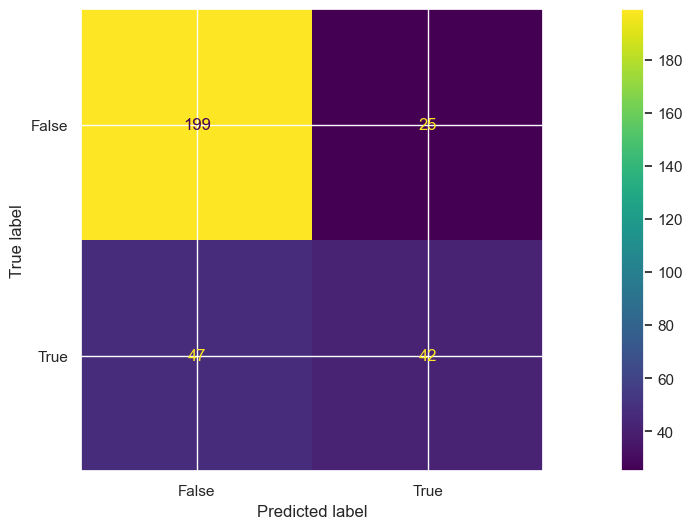

[[199  25]
 [ 47  42]]


In [96]:
#  Creating the Confusion Matrix for Predicted vs. True Values
cm = confusion_matrix(Y_Test, Y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()
print (cm)

In [97]:
matrix = classification_report(Y_Test,Y_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       224
           1       0.63      0.47      0.54        89

    accuracy                           0.77       313
   macro avg       0.72      0.68      0.69       313
weighted avg       0.76      0.77      0.76       313



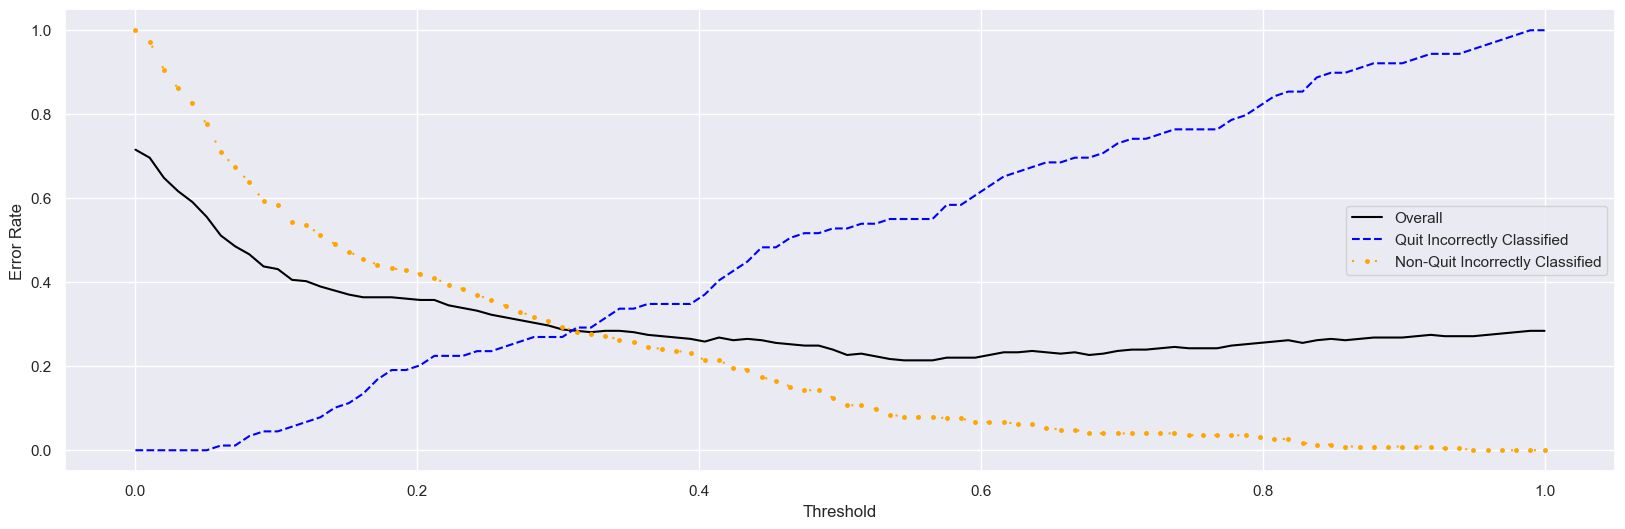

In [98]:
acc=[]
err_def=[]
err_non_def=[]
sensitivity=[]
thres=np.linspace(0,1,100)
for pp in thres:
    y_pred = (model.predict_proba(X_Test)[:, 1] >= pp).astype(int)
    acc.append(1-(accuracy_score(Y_Test, y_pred)))
    cm = confusion_matrix(Y_Test, y_pred)
    err_def.append(cm[1,0]/(cm[1,0]+cm[1,1]))
    err_non_def.append(cm[0,1]/(cm[0,0]+cm[0,1]))
    sensitivity.append(cm[1,1]/(cm[1,0]+cm[1,1]))
 #   l_specifity. append(1-err_non_def)

plt.plot(thres, acc, color="black", linestyle='solid',
         label="Overall")
plt.plot(thres, err_def, color="blue", linestyle='dashed',
         label="Quit Incorrectly Classified")
plt.plot(thres, err_non_def, color="orange", linestyle=(0,(1,10)),
         label="Non-Quit Incorrectly Classified",
         marker=".", markersize=5)
plt.legend(loc='best')
plt.xlabel("Threshold")
plt.ylabel("Error Rate")
plt.show();

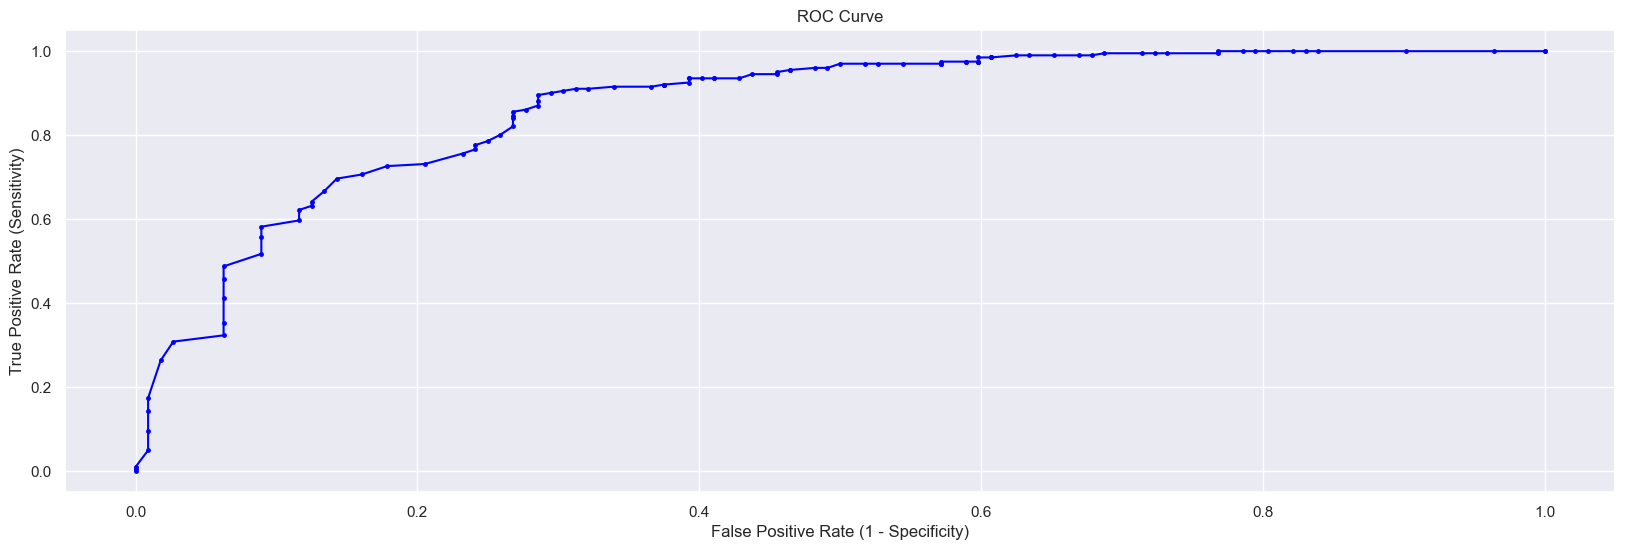

In [74]:
plt.plot(err_non_def, sensitivity, color="blue", linestyle="solid",
         label="Non-Diabetic Customers Incorrectly Classified",
         marker=".", markersize=5)

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve");

### K-Neighbors Models

In [52]:
for i in range (1,25):
  model=KNeighborsClassifier(n_neighbors=i)
  model.fit(X_Train, Y_Train)
  Y_pred5 = (model.predict_proba(X_Test)[:, 1] >= 0.5).astype(int)
  cm = confusion_matrix(Y_Test, Y_pred)
  print()
  print("Neighbors =", i)
  matrix = classification_report(Y_Test,Y_pred5)
  print(matrix)


Neighbors = 1
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       112
           1       0.74      0.73      0.73       201

    accuracy                           0.66       313
   macro avg       0.63      0.63      0.63       313
weighted avg       0.66      0.66      0.66       313


Neighbors = 2
              precision    recall  f1-score   support

           0       0.68      0.34      0.45       112
           1       0.71      0.91      0.80       201

    accuracy                           0.71       313
   macro avg       0.70      0.62      0.63       313
weighted avg       0.70      0.71      0.68       313


Neighbors = 3
              precision    recall  f1-score   support

           0       0.63      0.49      0.55       112
           1       0.75      0.84      0.79       201

    accuracy                           0.72       313
   macro avg       0.69      0.67      0.67       313
weighted avg       0.71      

In [ ]:
sns.histplot(data = df['Antiguedad'], kde = True, bins=37)

In [ ]:
sns.histplot(data = df['Antiguedad'], kde = True, bins=15)

### Workplace Diversity Analysis

El concepto de Diversidad, Equidad e Igualdad (DEI) en las áreas de trabajo requiere entender los distintos tipos de etnicidad, habilidades, género, orientación sexual, neurodiversidad y más características que diferencian a los individuos y enriquecen a las comunidades.

#### Variables 

En los datos proporcionados, el género y los niveles están presentes y permiten hacer algunas comparciones básicas en lo referente a equidad de género.

El análisis realizado se mostrará en las siguietes gráficas.

Sin embargo, no existen datos que permitan evaluar otros factores como:

    - la representación de personas con capacidades diferentes en los distintos niveles de la empresa
    - la diversidad en orientación sexual e identidad de género de los empleados más allá de un  modelo binario
    - la capacidad de la empresa de emplear personal con neurodiversidad 

Una propuesta importante para mejorar las condiciones en el ambiente laboral es la creación de una posición denominada Chief Diversity Officer que entre otras cosas desempeña las funciones de:

 - Analizar la situación de la empresa e identificar los retos sociales y corporativos.
 - Diseñar la estrategia de diversidad, equidad, inclusión y pertenencia (DEIB)
 - Elaborar la identidad y los mensajes clave de DEIB
 - Crear el sistema de métricas y KPIs estratégicos
 - Gestiona las denuncias por situaciones de discriminación y acoso

Fuente: https://fundacionadecco.org/azimut/tendencias-diversidad-equidad-inclusion/

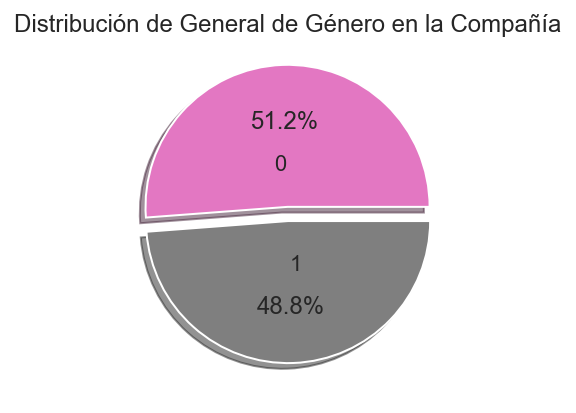

In [64]:
# ¿Cuántas mujeres y cuantos hombres hay en estos datos?
c1_g='Género'
c2_g='Cantidad'
sexo=df.Sexo.value_counts(dropna=False).to_frame()
sexo.reset_index(level=0, inplace=True)
sexo=sexo.set_axis([c1_g, c2_g], axis=1)
sexo


#c1_a='Rango de Edad'
c2_a='Cantidad'
c1_g='Género'
dist_edad=df.groupby("Sexo")["Grupo_de_personal"].value_counts(dropna=False).sort_index(ascending=True).to_frame()
dist_edad.reset_index(level=0, inplace=True)
dist_edad=dist_edad.set_axis([c1_g ,c2_a], axis=1)
dist_edad.reset_index(level=0, inplace=True)
dist_edad

#  Creating pie chart for gender ranges 

#define Seaborn color palette to use
colors = sns.color_palette("tab10")[6:8]
fig = plt.figure(figsize=(7,20),dpi=144)

ax = fig.add_subplot(121)
ax=plt.pie(sexo[c2_g], 
           labels = sexo[c1_g], 
           colors = colors, 
           autopct='%.1f%%', 
           explode= [0.1,0], 
           pctdistance=0.6, 
           labeldistance=.3, 
           shadow=True)
plt.title("Distribución de General de Género en la Compañía")






# Showing the plot
plt.show()



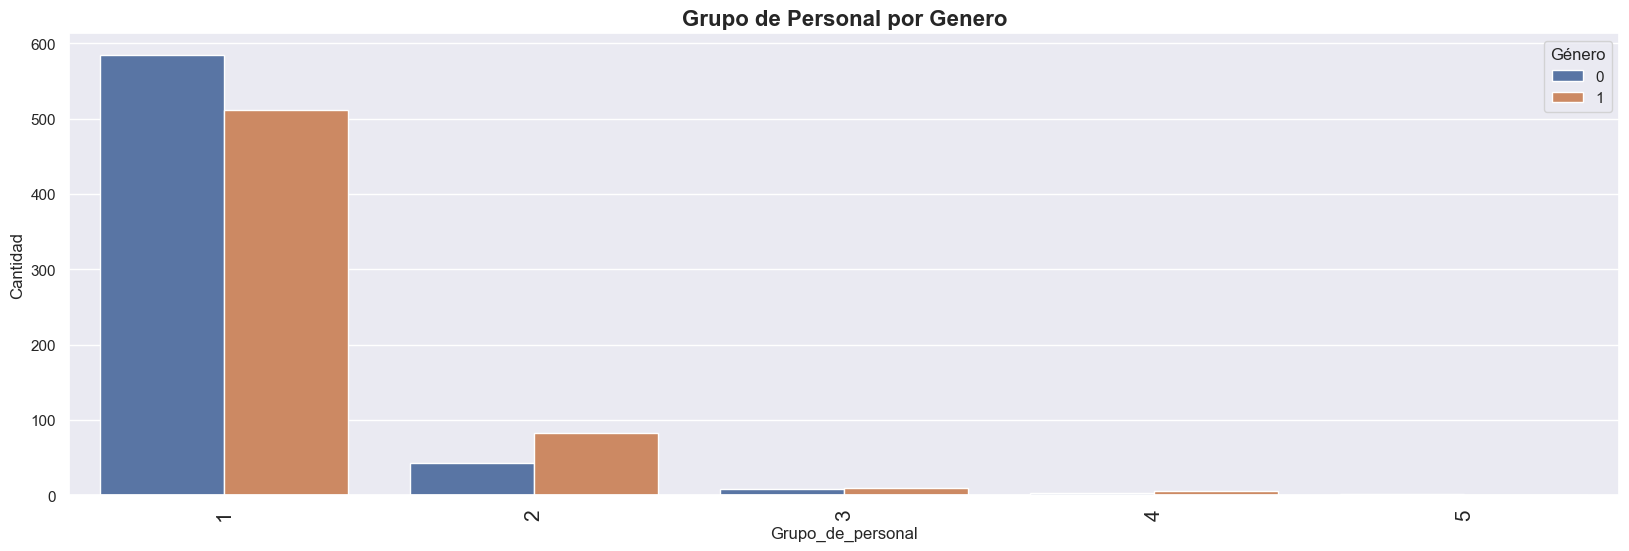

In [65]:

sns.set(rc={"figure.figsize":(20, 6)})

#  Creating a barplot to compare the level of group by gender
#  Using seaborn to generate a bar plot

#  Setting the dimensions of the plot

# Defining the x and y data and setting the title for the bar plot
plot=sns.barplot(x ="Grupo_de_personal", y = c2_a, hue = c1_g, data = dist_edad, 
                 errorbar = None).set_title('Grupo de Personal por Genero', size=16, weight="bold")
# Using the simplified activity class description column for the x ticks and rotating the labels 90 degrees
plt.xticks(dist_edad.index[0:5], dist_edad["Grupo_de_personal"][0:5], rotation = 90,size=15) 
# Showing the plot
plt.show()

C:\Users\argodoy\AppData\Local\Temp\ipykernel_14880\2659608543.py:7: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dist_edad.set_axis([c1_g ,c2_a], axis=1, inplace=True)


ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of labels (5).

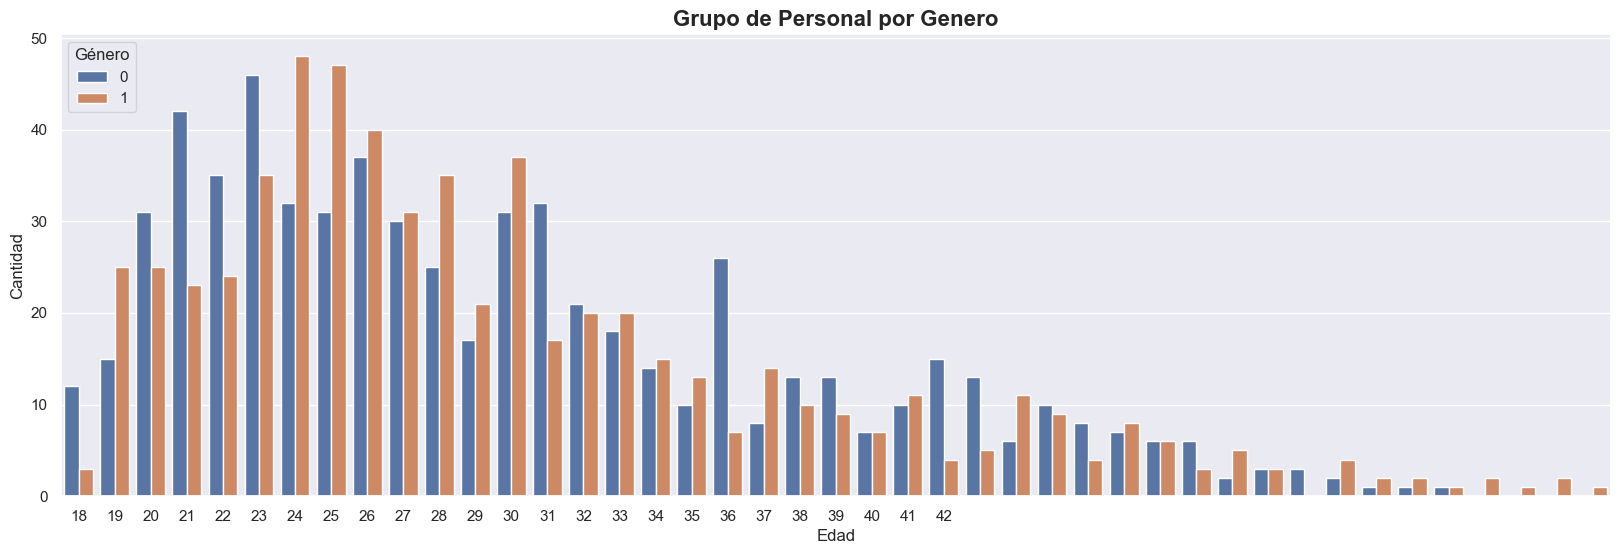

In [68]:
# ¿Cual es la distribución de edad por sexo?
c1_a='Rango de Edad'
c2_a='Cantidad'
c1_g='Género'
dist_edad=df.groupby("Sexo")["Edad"].value_counts(dropna=False).sort_index(ascending=True).to_frame()
dist_edad.reset_index(level=0, inplace=True)
dist_edad.set_axis([c1_g ,c2_a], axis=1, inplace=True)
dist_edad.reset_index(level=0, inplace=True)
#dist_edad.at[6, "RANGO DE EDAD"]='No Respondió'
#dist_edad.at[13, "RANGO DE EDAD"]='No Respondió'
dist_edad

sns.set(rc={"figure.figsize":(20, 6)})

#  Creating a barplot to compare the level of group by gender
#  Using seaborn to generate a bar plot

#  Setting the dimensions of the plot

# Defining the x and y data and setting the title for the bar plot
plot=sns.barplot(x ="Edad", y = c2_a, hue = c1_g, data = dist_edad, 
                 errorbar = None).set_title('Grupo de Personal por Genero', size=16, weight="bold")
# Using the simplified activity class description column for the x ticks and rotating the labels 90 degrees
plt.xticks(dist_edad.index[0:25], dist_edad["Edad"][0:5], rotation = 90,size=15) 
# Showing the plot
plt.show()